In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Genera un esempio di serie temporali di input
X = np.random.rand(100, 10)  # 100 esempi di serie temporali con 10 punti ciascuno

# Genera le etichette di classe per l'input
y = np.random.randint(0, 2, 100)  # 100 etichette binarie

# Suddivide i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crea un classificatore SVM
clf = SVC()

# Addestra il classificatore SVM
clf.fit(X_train, y_train)

# Effettua la previsione sul set di test
y_pred = clf.predict(X_test)

# Calcola l'accuratezza della classificazione
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.45


In [2]:
len(X_test)

20

In questo esempio, generiamo un set di dati di input X che consiste in 100 serie temporali di lunghezza 10. Generiamo anche le etichette di classe y, che sono 100 valori binari (0 o 1) corrispondenti alle serie temporali. Successivamente, suddividiamo i dati in set di addestramento e test utilizzando train_test_split dalla libreria scikit-learn.

Poi creiamo un classificatore SVM utilizzando SVC e addestriamo il modello sul set di addestramento con il metodo fit. Infine, facciamo previsioni sul set di test con il metodo predict e calcoliamo l'accuratezza della classificazione utilizzando accuracy_score.

Ricorda che questo è solo un esempio di come utilizzare un classificatore SVM per la classificazione di serie temporali. A seconda del tuo specifico problema e dei dati, potresti dover utilizzare altre tecniche di pre-elaborazione dei dati o diversi algoritmi di apprendimento automatico per ottenere risultati ottimali.


# prova classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import librosa
from IPython.display import Audio 
from collections import defaultdict
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
X_train = np.load("RavdessAudioOnlyNumpy__X_train.npy")
X_test = np.load("RavdessAudioOnlyNumpy__X_test.npy")
y_train=pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv")
y_test=pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv")
X_train[np.isnan(X_train)] = 0
X_test[np.isnan(X_test)] = 0
X=np.vstack((X_train,X_test))
df=pd.DataFrame(X)

X_train_decimated = np.load("RavdessAudioOnlyNumpy__X_train_decimated.npy")
X_test_decimated = np.load("RavdessAudioOnlyNumpy__X_test_decimated.npy")
X_decimated=np.vstack((X_train_decimated,X_test_decimated))
df_decimated=pd.DataFrame(X_decimated)

X_train_decimated_scaled = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled.npy")
X_test_decimated_scaled = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled.npy")
X_decimated_scaled=np.vstack((X_train_decimated_scaled,X_test_decimated_scaled))
df_decimated_scaled=pd.DataFrame(X_decimated_scaled)

X_train_decimated_scaled_ft = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled_ft.npy")
X_test_decimated_scaled_ft = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled_ft.npy")
X_decimated_scaled_ft=np.vstack((X_train_decimated_scaled_ft,X_test_decimated_scaled_ft))
df_decimated_scaled_ft=pd.DataFrame(X_decimated_scaled_ft)

X_train_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled_max.npy")
X_test_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled_max.npy")
X_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_decimated_scaled_max.npy")
df_decimated_scaled_max=pd.DataFrame(X_decimated_scaled_max)

In [7]:
y_train_em = y_train.emotion.values
y_test_em = y_test.emotion.values

In [8]:
X_train_decimated_scaled_max.shape

(1828, 50)

In [9]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

In [10]:
accuracy_sc = []
f1_sc = []
for i in range(1, 40):
    clf = KNeighborsTimeSeriesClassifier(n_neighbors=i, weights='uniform', metric='euclidean')
    clf.fit(X_train_decimated_scaled_max, y_train_em)

    y_pred = clf.predict(X_test_decimated_scaled_max)
    accuracy_sc.append(accuracy_score(y_test_em, y_pred))
    f1_sc.append(f1_score(y_test_em, y_pred, average=None))
                 

#print('Accuracy %s' % accuracy_score(y_test_em, y_pred))
#print('F1-score %s' % f1_score(y_test_em, y_pred, average=None))
#print(classification_report(y_test_em, y_pred))


<function matplotlib.pyplot.show(close=None, block=None)>

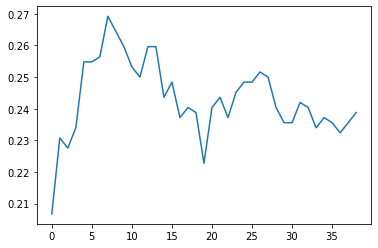

In [11]:
plt.plot(accuracy_sc)
plt.show

In [12]:
clf = KNeighborsTimeSeriesClassifier(n_neighbors=8, weights='uniform', metric='euclidean')
clf.fit(X_train_decimated_scaled_max, y_train_em)

y_pred = clf.predict(X_test_decimated_scaled_max)

print('Accuracy %s' % accuracy_score(y_test_em, y_pred))
print('F1-score %s' % f1_score(y_test_em, y_pred, average=None))
print(classification_report(y_test_em, y_pred))

Accuracy 0.2692307692307692
F1-score [0.35185185 0.41984733 0.14705882 0.2        0.28070175 0.1981982
 0.16393443 0.08955224]
              precision    recall  f1-score   support

       angry       0.32      0.40      0.35        96
        calm       0.33      0.57      0.42        96
     disgust       0.25      0.10      0.15        48
     fearful       0.23      0.18      0.20        96
       happy       0.32      0.25      0.28        96
     neutral       0.17      0.23      0.20        48
         sad       0.17      0.16      0.16        96
   surprised       0.16      0.06      0.09        48

    accuracy                           0.27       624
   macro avg       0.24      0.24      0.23       624
weighted avg       0.26      0.27      0.25       624



In [13]:
'''
plt.figure(figsize=(15,15))
cf = confusion_matrix(y_test_em, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()
'''

'\nplt.figure(figsize=(15,15))\ncf = confusion_matrix(y_test_em, y_pred)\nsns.heatmap(cf, annot=True, cmap="Greens")\nplt.xlabel("True")\nplt.ylabel("Predicted")\nplt.show()\n'

In [14]:
'''
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()
'''

'\ny_score = clf.predict_proba(X_test)\nplot_roc(y_test, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)\nplt.title("")\nplt.show()\n'

In [15]:
print(accuracy_sc[:10])

[0.20673076923076922, 0.23076923076923078, 0.22756410256410256, 0.23397435897435898, 0.2548076923076923, 0.2548076923076923, 0.2564102564102564, 0.2692307692307692, 0.2644230769230769, 0.25961538461538464]


<function matplotlib.pyplot.show(close=None, block=None)>

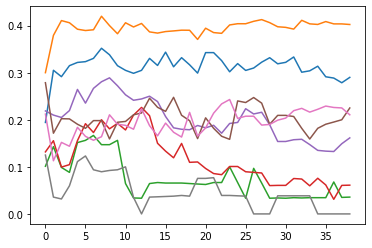

In [16]:
plt.plot(f1_sc)
plt.show

In [17]:

accuracy_sc_dtw = []
f1_sc_dtw = []
for i in range(1, 10):
    clf = KNeighborsTimeSeriesClassifier(n_neighbors=i, weights='uniform', metric='dtw')
    clf.fit(X_train_decimated_scaled_max, y_train_em)

    y_pred = clf.predict(X_test_decimated_scaled_max)
    accuracy_sc_dtw.append(accuracy_score(y_test_em, y_pred))
    f1_sc_dtw.append(f1_score(y_test_em, y_pred, average=None))
                 

#print('Accuracy %s' % accuracy_score(y_test_em, y_pred))
#print('F1-score %s' % f1_score(y_test_em, y_pred, average=None))
#print(classification_report(y_test_em, y_pred))


KeyboardInterrupt: 

In [ ]:
plt.plot(accuracy_sc_dtw)
plt.show

In [ ]:

clf = KNeighborsTimeSeriesClassifier(n_neighbors=6, weights='uniform', metric='dtw')
clf.fit(X_train_decimated_scaled_max, y_train_em)

y_pred = clf.predict(X_test_decimated_scaled_max)

print('Accuracy %s' % accuracy_score(y_test_em, y_pred))
print('F1-score %s' % f1_score(y_test_em, y_pred, average=None))
print(classification_report(y_test_em, y_pred))

In [ ]:

clf = KNeighborsTimeSeriesClassifier(n_neighbors=6, weights='uniform', metric='dtw')
clf.fit(X_train_decimated_scaled_max, y_train_em)

y_pred = clf.predict(X_test_decimated_scaled_max)

print('Accuracy %s' % accuracy_score(y_test_em, y_pred))
print('F1-score %s' % f1_score(y_test_em, y_pred, average=None))
print(classification_report(y_test_em, y_pred))

# rocket

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import Rocket

In [ ]:
'''
%%time
rocket = Rocket()  # by default, MiniRocket uses ~10,000 kernels
rocket.fit(X_train_decimated_scaled_max)
X_train_transform = rocket.transform(X_train_decimated_scaled_max)
clf = RidgeClassifierCV(normalize=True)
clf.fit(X_train_transform, y_train_em)
'''

In [ ]:
#X_train_transform.shape

In [ ]:
#y_train_em.shape

In [ ]:
'''
X_test_transform = rocket.transform(X_test_decimated_scaled_max)
y_pred = clf.predict(X_test_transform)
print(classification_report(y_test_em, y_pred))
'''

### Canonical Interval Forest (CIF)

In [18]:
from sktime.classification.interval_based import CanonicalIntervalForest

In [19]:
acc = []
f1 = []
for i in range(1, 30):
    clf = CanonicalIntervalForest(n_estimators=i)
    clf.fit(X_train_decimated_scaled_max, y_train_em)
    y_pred = clf.predict(X_test_decimated_scaled_max)
    acc.append(accuracy_score(y_test_em, y_pred))
    f1.append(f1_score(y_test_em, y_pred, average=None))
#30 estimatori = 6 minuti 0.24
#20 estimatori = 4 minuti 0.26
#10 estimatori = 2 minuti 0.22

KeyboardInterrupt: 

<function matplotlib.pyplot.show(close=None, block=None)>

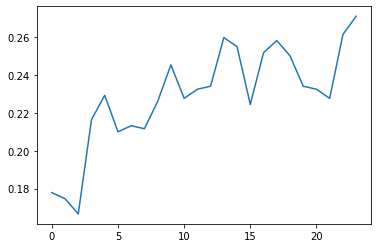

In [21]:
plt.plot(acc)
plt.show

In [24]:
clf = CanonicalIntervalForest(n_estimators=24)
clf.fit(X_train_decimated_scaled_max, y_train_em)

CanonicalIntervalForest(n_estimators=24)

In [25]:
y_pred = clf.predict(X_test_decimated_scaled_max)
print('Accuracy %s' % accuracy_score(y_test_em, y_pred))
print('F1-score %s' % f1_score(y_test_em, y_pred, average=None))
print(classification_report(y_test_em, y_pred))

Accuracy 0.28525641025641024
F1-score [0.39631336 0.40707965 0.13888889 0.22340426 0.22009569 0.14084507
 0.29896907 0.16901408]
              precision    recall  f1-score   support

       angry       0.36      0.45      0.40        96
        calm       0.35      0.48      0.41        96
     disgust       0.21      0.10      0.14        48
     fearful       0.23      0.22      0.22        96
       happy       0.20      0.24      0.22        96
     neutral       0.22      0.10      0.14        48
         sad       0.30      0.30      0.30        96
   surprised       0.26      0.12      0.17        48

    accuracy                           0.29       624
   macro avg       0.27      0.25      0.25       624
weighted avg       0.27      0.29      0.27       624



# shapelet

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from pyts.datasets import load_gunpoint
from pyts.classification import LearningShapelets

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from pyts.datasets import load_gunpoint
from pyts.classification import LearningShapelets

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf = LearningShapelets(n_shapelets=3, window_sizes=[20, 40, 60], 
                        time_contract_in_mins=0.5, n_jobs=1, 
                        random_state=42, verbose=0, 
                        learning_algorithm=knn)


In [ ]:
clf.fit(X_train_decimated_scaled_max, y_train_em)

In [ ]:
y_pred = clf.predict(X_test_decimated_scaled_max)

In [ ]:
accuracy = np.mean(y_pred == y_test_em) * 100
print("Accuracy:", accuracy)